In [1]:
from game import *
from random_player import RandomPlayer
from heuristic_player import *
import torch

In [2]:
randomPlayer = RandomPlayer()
heuristicPlayer = HeuristicPlayer()
aggressivePlayer = AggressiveHeuristicPlayer()
pacificPlayer = PacificHeuristicPlayer()

-----

In [3]:
board, pieces = init_game()
playerA = RandomPlayer()
playerB = RandomPlayer()
piece_idx = 0  # exploiting symmetry
for turn in range(8):
    if turn % 2 == 0:
        piece = pieces[1:, piece_idx]
        place_i, place_j = playerA.place(board, pieces, piece)
        board[0, place_i, place_j] = 1
        board[1:, place_i, place_j] = piece
        pieces[0, piece_idx] = 0
        if checkAlign(board):
            print("A wins")
        piece_idx = playerA.give(board, pieces)
    else:
        piece = pieces[1:, piece_idx]
        place_i, place_j = playerB.place(board, pieces, piece)
        board[0, place_i, place_j] = 1
        board[1:, place_i, place_j] = piece
        pieces[0, piece_idx] = 0
        if checkAlign(board):
            print("B wins")
        if turn == 15:
            print("Draw")
        piece_idx = playerB.give(board, pieces)

plotBoard(board)
plotPieces(pieces)

64  
 f0 
   1
2 be

*0* *1* *2*  3  *4*  5  *6*  7   8   9   a  *b*  c   d  *e* *f* 


In [4]:
print(full_game(randomPlayer, randomPlayer, False))

A


-----

In [5]:
A_wins, B_wins, draws = multiple_games(randomPlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 5, B_wins: 5, draws: 0


In [6]:
A_wins, B_wins, draws = multiple_games(heuristicPlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 9, B_wins: 1, draws: 0


In [7]:
A_wins, B_wins, draws = multiple_games(aggressivePlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 8, B_wins: 2, draws: 0


In [8]:
A_wins, B_wins, draws = multiple_games(pacificPlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 10, B_wins: 0, draws: 0


-----

In [9]:
players = [randomPlayer, heuristicPlayer, aggressivePlayer, pacificPlayer]
n_games = 1
tournament_results = tournament(players, n_games)
import pickle
with open(f'tournament_results-{n_games}.pkl', 'wb') as f:
    pickle.dump(tournament_results, f)

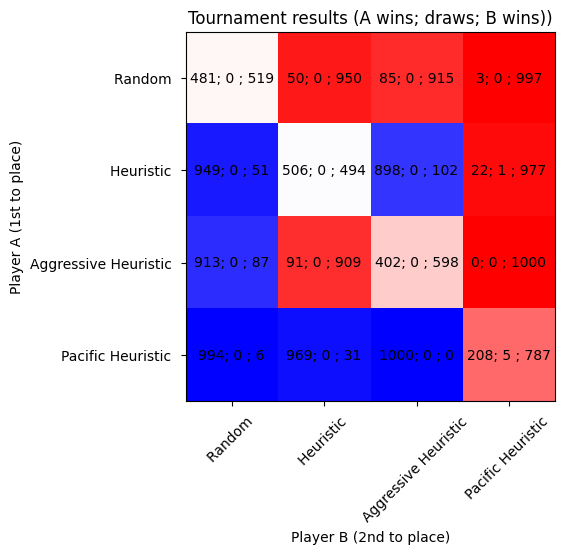

In [10]:
n_games = 1000
with open(f'tournament_results-{n_games}.pkl', 'rb') as f:
    tournament_results = pickle.load(f)
plot_tournament(tournament_results)